# GE Bracket

Geometry from the GE jet engine bracket challenge: https://grabcad.com/challenges/ge-jet-engine-bracket-challenge

Load cases considered in the optimization: 35.6 kN vertical force / 37.8 kN horizontal force

For numerical reasons, the force was rescaled by a factor of 0.01. Therefore, to obtain the actual compliance it is necessary to multiply the output by 10000 and to obtain the actual displament it is necessary to multiply the output by 100.

Ansys model:
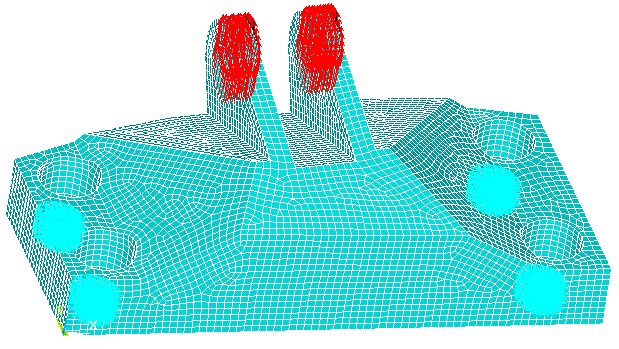

In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

import pyvista as pv
pv.set_plot_theme('document')
pv.set_jupyter_backend('static')

import numpy as np
from optim import TopOpt, Post3D

In [3]:
Ex   = 113.8e3 # MPa
Ey   = 113.8e3 # MPa
Gxy  = 44e3 # MPa
nuxy = 0.342
nuyz = 0.342
rho  = 4430e-12 # t/mm^3
CO2mat = 55 # kgCO2/kg

CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

In [4]:
solver1 = TopOpt(inputfile='models/bracket.db', load_cases=('models/bracket_ver.s01', 'models/bracket_hor.s01'), res_dir='results/SIMP/bracket/',
        dim='SIMP3D', jobname='bracket')
solver1.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver1.set_volfrac(0.2)
solver1.set_filters(r_rho=5, r_theta=7)
solver1.set_initial_conditions('random')
solver1.set_optim_options(max_iter=50, tol=5e-3, continuation=True)

region1 = np.where((solver1.centers[:,0]-15.5)**2 + (solver1.centers[:,1]-13.5)**2 < 8**2)[0]
region2 = np.where((solver1.centers[:,0]-15.2)**2 + (solver1.centers[:,1]-51.8)**2 < 8**2)[0]
region3 = np.where((solver1.centers[:,0]-163.2)**2 + (solver1.centers[:,1]-47.3)**2 < 8**2)[0]
region4 = np.where((solver1.centers[:,0]-163.2)**2 + (solver1.centers[:,1]+4.9)**2 < 8**2)[0]
region5 = np.where((solver1.centers[:,1]-73)**2 + (solver1.centers[:,2]-40.5)**2 < 15**2)[0]
solid = np.concatenate([region1, region2, region3, region4, region5])
solver1.set_solid_elem(solid)

solver1.run()
solver1.save()

solver1.print_timing()

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Iteration   0...  c_1 =     2.3877, c_2 =     0.5052
Iteration   1...  c_1 =     2.1872, c_2 =     0.5080
Iteration   2...  c_1 =     1.8591, c_2 =     0.4777
Iteration   3...  c_1 =     1.6698, c_2 =     0.4693
Iteration   4...  c_1 =     1.5610, c_2 =     0.4636
Iteration   5...  c_1 =     1.4884, c_2 =     0.4776
Iteration   6...  c_1 =     1.4409, c_2 =     0.4744
Iteration   7...  c_1 =     1.4126, c_2 =     0.4897
Iteration   8...  c_1 =     1.3916, c_2 =     0.4926
Iteration   9...  c_1 =     1.3762, c_2 =     0.5022
Iteration  10...  c_1 =     1.3611, c_2 =     0.5103
Iteration  11...  c_1 =     1.3492, c_2 =     0.5154
Iteration  12...  c_1 =     1.3405, c_2 =     0.5230
Iteration  13...  c_1 =     1.3341, c_2 =     0.5265
Iteration  14...  c_

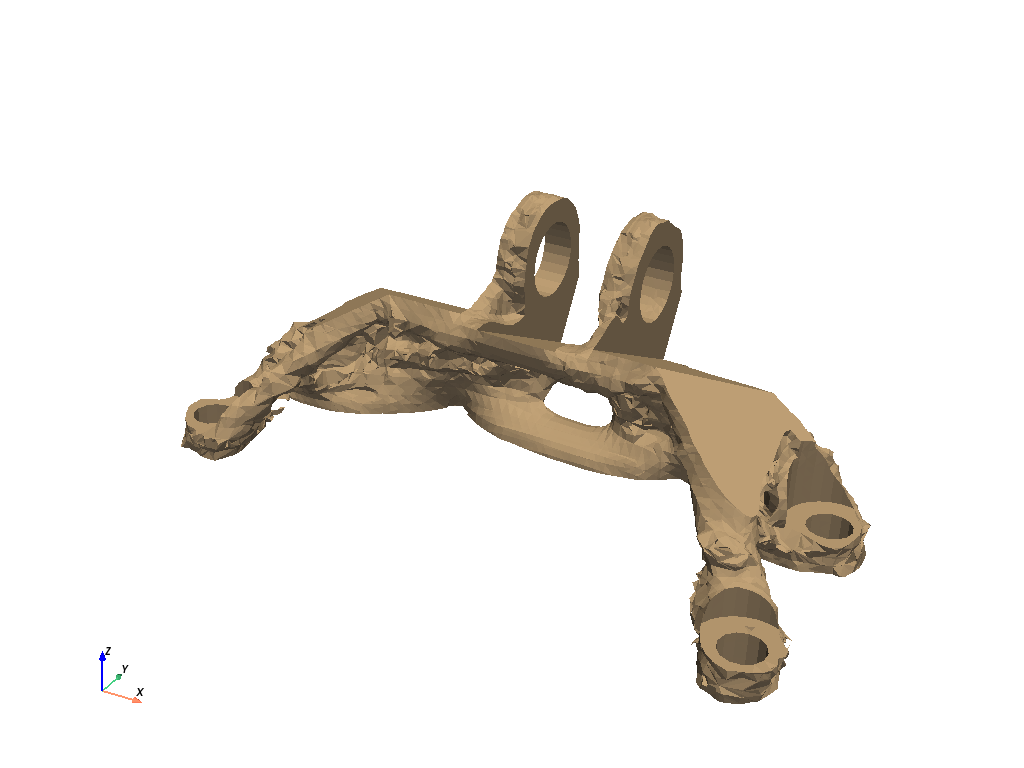

In [6]:
# solver1 = TopOpt.load('results/SIMP/bracket/topopt.json')
post1 = Post3D(solver1)
post1.plot_iso(threshold=0.55)